In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the dataset
url = "https://github.com/dsrscientist/Dataset2/raw/main/temperature.csv"
df = pd.read_csv(url)

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [9]:
# Data preprocessing: Handling missing values by filling with mean
df.fillna(df.mean(), inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


In [11]:
# Split the dataset into training and testing sets
X = df.drop(['Next_Tmax', 'Next_Tmin', 'Date'], axis=1)  # Exclude Date column and target variables
y_max = df['Next_Tmax']  # Target variable for maximum temperature prediction
y_min = df['Next_Tmin']  # Target variable for minimum temperature prediction

In [12]:
X_train, X_test, y_max_train, y_max_test, y_min_train, y_min_test = train_test_split(
    X, y_max, y_min, test_size=0.2, random_state=42)

In [13]:
# Initialize and train separate models for max and min temperature prediction
max_temp_model = LinearRegression()
min_temp_model = LinearRegression()

In [14]:
max_temp_model.fit(X_train, y_max_train)
min_temp_model.fit(X_train, y_min_train)

LinearRegression()

In [15]:
# Make predictions
max_temp_preds = max_temp_model.predict(X_test)
min_temp_preds = min_temp_model.predict(X_test)

In [16]:
# Evaluate the models
max_temp_mae = mean_absolute_error(y_max_test, max_temp_preds)
min_temp_mae = mean_absolute_error(y_min_test, min_temp_preds)

max_temp_mse = mean_squared_error(y_max_test, max_temp_preds)
min_temp_mse = mean_squared_error(y_min_test, min_temp_preds)

max_temp_rmse = mean_squared_error(y_max_test, max_temp_preds, squared=False)
min_temp_rmse = mean_squared_error(y_min_test, min_temp_preds, squared=False)

In [17]:
# Print evaluation metrics
print("Maximum Temperature Prediction Metrics:")
print(f"MAE: {max_temp_mae}")
print(f"MSE: {max_temp_mse}")
print(f"RMSE: {max_temp_rmse}")

Maximum Temperature Prediction Metrics:
MAE: 1.1339440056657655
MSE: 2.2586572687093938
RMSE: 1.5028829857009474


In [18]:
print("\nMinimum Temperature Prediction Metrics:")
print(f"MAE: {min_temp_mae}")
print(f"MSE: {min_temp_mse}")
print(f"RMSE: {min_temp_rmse}")


Minimum Temperature Prediction Metrics:
MAE: 0.7631250997459684
MSE: 0.9644785082807328
RMSE: 0.982078667053069


In [19]:
import matplotlib.pyplot as plt

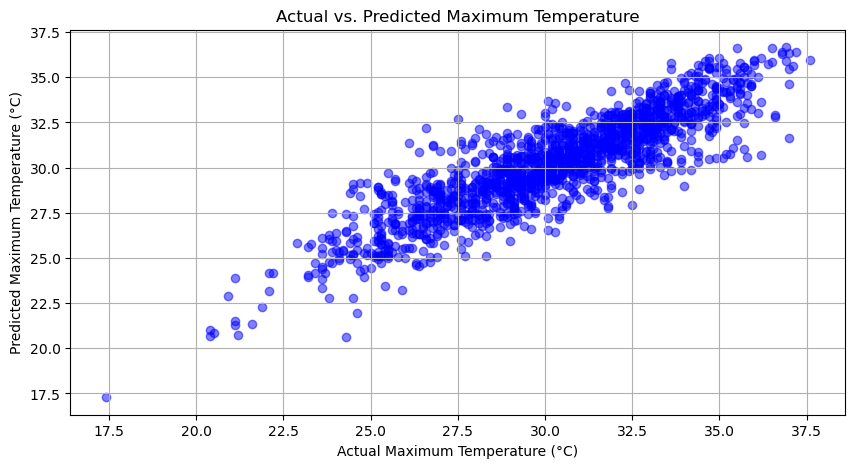

In [20]:
# Scatter plot for Maximum Temperature
plt.figure(figsize=(10, 5))
plt.scatter(y_max_test, max_temp_preds, color='blue', alpha=0.5)
plt.xlabel('Actual Maximum Temperature (°C)')
plt.ylabel('Predicted Maximum Temperature (°C)')
plt.title('Actual vs. Predicted Maximum Temperature')
plt.grid(True)
plt.show()

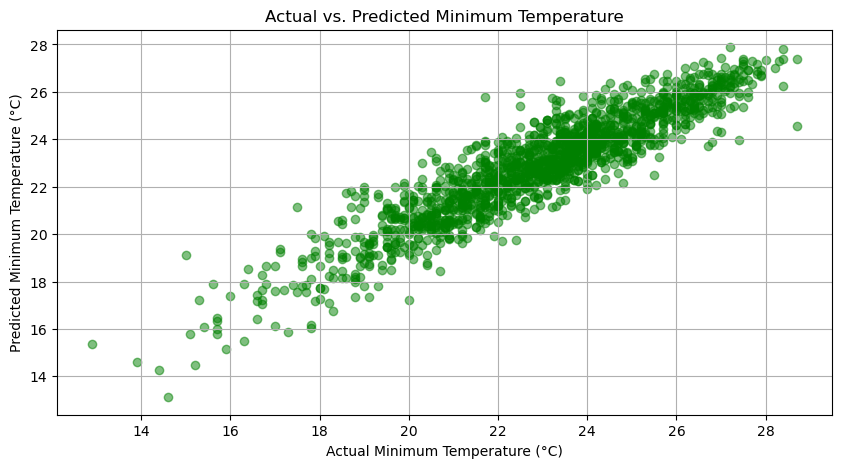

In [21]:
# Scatter plot for Minimum Temperature
plt.figure(figsize=(10, 5))
plt.scatter(y_min_test, min_temp_preds, color='green', alpha=0.5)
plt.xlabel('Actual Minimum Temperature (°C)')
plt.ylabel('Predicted Minimum Temperature (°C)')
plt.title('Actual vs. Predicted Minimum Temperature')
plt.grid(True)
plt.show()